In [1]:
# import libraries 
import torch
import torch.nn as nn
from torch.autograd import Variable

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [47]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

In [62]:
class Quadratic(nn.Module):
    """ Custom layer that maps [x] -> [x^2, x]"""
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return torch.cat((torch.square(x), x), 1)    

In [63]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 1),           
            Quadratic(),
            nn.Linear(2, 1),       
        )

    def forward(self, x):
        yh = self.layer_stack(x)
        return yh

In [75]:
xor_network = XOR()

In [76]:
Xs = Xs.to(device)
y = y.to(device)
xor_network = xor_network.to(device)

In [77]:
epochs = 1000 
mseloss = nn.MSELoss() 
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03) 
all_losses = [] 
current_loss = 0 
plot_every = 50 
 
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = xor_network.forward(Xs)
    
    # calculate MSE loss   
    loss = mseloss(yhat, y)
      
    # backpropogate through the loss gradiants   
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % plot_every == 0:
        all_losses.append((current_loss / plot_every).item())       
        current_loss = 0 
     
    # print progress   
    if epoch % 100 == 0:     
        print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 100 completed
Epoch: 200 completed
Epoch: 300 completed
Epoch: 400 completed
Epoch: 500 completed
Epoch: 600 completed
Epoch: 700 completed
Epoch: 800 completed
Epoch: 900 completed


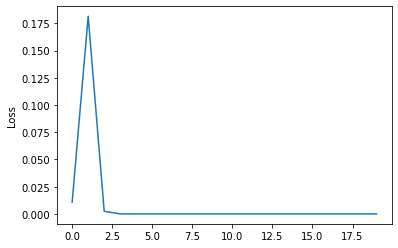

In [78]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [79]:
all_losses

[0.010840914212167263,
 0.1815599799156189,
 0.002408345229923725,
 2.7033402147935703e-05,
 2.6903879302153655e-07,
 1.2154752937476587e-07,
 1.305439809584641e-07,
 1.4478824539310153e-07,
 1.5535982811343274e-07,
 1.599004946228888e-07,
 1.4913973700458882e-07,
 1.5920835494398489e-07,
 1.2631674906060653e-07,
 2.295803227525539e-07,
 1.7394852136476402e-07,
 1.3792954689506587e-07,
 1.3715897750898876e-07,
 1.4575734041955002e-07,
 1.496384385291094e-07,
 1.2134735527524754e-07]

In [74]:
xor_network.forward(Xs)

tensor([[-2.1762e-04],
        [ 9.9995e-01],
        [ 9.9996e-01],
        [ 5.1874e-04]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [46]:
Quadratic().forward(Xs)

tensor([[ 1.,  1., -1., -1.],
        [ 1.,  1., -1.,  1.],
        [ 1.,  1.,  1., -1.],
        [ 1.,  1.,  1.,  1.]])